In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [3]:
df = pd.read_csv('fc1.csv')
df.head()

,Date,Year,DOY,Solar,Wind_speed,Wind_dir,gust,temp,rh,precip,...,Webber Springs,Webster Flat,Whiskey Ck,Whiskey Park,White Elephant,White Mill,Widtsoe #3,Willow Creek,Willow Creek Pass,Windy Peak
0,10/1/2001,2001,274,383.0,2.00,120.0,19.0,47.8,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
1,10/2/2001,2001,275,478.0,3.83,124.0,27.0,49.0,40.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10/3/2001,2001,276,482.0,3.35,60.0,22.0,47.3,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10/4/2001,2001,277,483.0,5.12,333.0,27.0,47.2,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
4,10/5/2001,2001,278,482.0,3.46,3.0,24.0,39.2,38.0,0.0,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3


In [4]:
target =df['binary_1']
taget_names = ['yes','no']

y = df["binary_1"]
target_names = ["0", "1"]


In [5]:


X = df.drop(['binary_1','Date'], axis = 1 )

X.fillna(df.mean(), inplace=True)

In [6]:
X

,Year,DOY,Solar,Wind_speed,Wind_dir,gust,temp,rh,precip,Agua Canyon,...,Webber Springs,Webster Flat,Whiskey Ck,Whiskey Park,White Elephant,White Mill,Widtsoe #3,Willow Creek,Willow Creek Pass,Windy Peak
0,2001,274,383.0,2.00,120.0,19.0,47.8,50.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
1,2001,275,478.0,3.83,124.0,27.0,49.0,40.0,0.00,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001,276,482.0,3.35,60.0,22.0,47.3,37.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2001,277,483.0,5.12,333.0,27.0,47.2,32.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
4,2001,278,482.0,3.46,3.0,24.0,39.2,38.0,0.00,0.1,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7088,2021,57,431.0,7.21,287.0,53.0,19.8,42.0,0.00,0.0,...,0.5,0.0,0.0,0.6,0.7,0.2,0.0,0.6,0.0,0.0
7089,2021,58,210.0,4.12,346.0,24.0,11.8,70.0,0.00,0.0,...,0.2,0.0,0.0,0.3,0.1,0.0,0.0,0.5,0.3,0.1
7090,2021,59,493.0,3.08,59.0,15.0,5.8,56.0,0.01,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.1,0.0,0.0
7091,2021,60,510.0,2.67,148.0,12.0,16.4,54.0,0.00,0.0,...,0.1,0.3,0.3,0.1,0.0,0.2,0.1,0.1,0.1,0.2


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.657
k: 3, Train/Test Score: 0.811/0.683
k: 5, Train/Test Score: 0.769/0.698
k: 7, Train/Test Score: 0.750/0.710
k: 9, Train/Test Score: 0.742/0.713
k: 11, Train/Test Score: 0.734/0.703
k: 13, Train/Test Score: 0.734/0.705


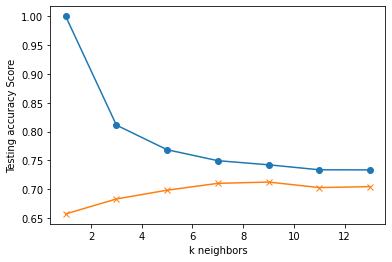

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 15, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 15, 2), train_scores, marker='o')
plt.plot(range(1, 15, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.710


In [11]:
predictions = knn.predict(X)

In [12]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
## get probability
preds=knn.predict_proba(X)

In [14]:
preds

array([[0.85714286, 0.14285714],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       ...,
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [0.71428571, 0.28571429]])